In [66]:
import random
import names
import matplotlib.pyplot as plt
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

In [67]:
class Predictor(object):
    """
    The predictor attemps to guess what the generator will produce.
    He gains a point if he predicts accurately and looses one if he doesn't
    """
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.gameScore = 0
        self.lastScore = 0
        self.scores = []
        self.sequence = ''
        # make players start with some rules
    
    def getRules(self, ruleset):
        for i in xrange(0, random.randint(0,20)):
            key = random.choice(ruleset.keys())
            newrule = random.choice(ruleset[key])
            self.rules.append(newrule)
        self.rules.sort(lambda x,y: cmp(len(y[0]), len(x[0])))
        
    def predict(self, generator):
        
        def arequivalent(s, r):
            for i in xrange(0, len(s)):
                if s[i] != r[i] and r[i] != 'X':
                    return False
            return True
        
        
        gsequence = generator.sequence
        slength = len(gsequence)
        
        for rule in self.rules:
            rlength = len(rule[0])
            if slength >= rlength:
                seqchunk = gsequence[-rlength:]
                if arequivalent(seqchunk, rule[0]):
                    predicted = rule[1]
                    #print seqchunk, rule[0]
                    self.sequence += predicted
                    return predicted
        randpred = str(random.randint(0,1))
        self.sequence += randpred
        #print "randomlypredicted"
        return randpred
    
    
    
    def predictorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.sequence = ''
        self.scores.append(self.gameScore)
        self.lastScore = self.gameScore
        self.gameScore = 0
        
    def mutate(self, ruleset):
        key = random.choice(ruleset.keys())
        newrule = random.choice(ruleset[key])
        self.rules.append(newrule)
        
        del self.rules[random.randint(0,len(self.rules) - 1)]
        
        self.rules.sort(lambda x,y: cmp(len(y[0]), len(x[0])))
        
        
    def crossover(self, secondParent):
        newgen = Predictor()
        newruleset = self.rules + secondParent.rules
        newruleset = newruleset[1::2]
        newgen.rules = newruleset
        return newgen
        
                
        
    
    
def createAllPreRules(length):
    
    L = ['']
    for n in range(length):
        tmp = []
        for el in L:
            if random.random() < 0.9:
                tmp.append(el+'0')
            else:
                tmp.append(el+'X')

            if random.random() < 0.9:
                tmp.append(el+'1')
            else:
                tmp.append(el+'X')
            tmp.append('')
        L = tmp
    L = sorted(set(L))
    
    formRules = {}
    
    for i in xrange(length+1):
        formRules[str(i)] = []
        
    for i in L:
        formRules[str(len(i))].append((i, '1'))
        formRules[str(len(i))].append((i, '0'))
    
    formRules.pop('0', None)
    return formRules

possiblePreRules = createAllPreRules(10)

In [68]:
class Generator(object):
    """
    The generator generates a string of 1's and 0's.
    If the predictor has accurately predicted his next element he looses a point, and if not he gains one
    """
    possibleRules = []
    
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.sequence = ''
        self.gameScore = 0
        self.lastScore = 0
        self.scores = []
        
    def generate(self):
        slength = len(self.sequence)
        for rule in self.rules:
            rlength = len(rule[0])
            if slength >= rlength:
                seqchunk = self.sequence[-rlength:]
                if seqchunk == rule[0]:
                    generated = rule[1]
                    self.sequence += generated
                    return generated
        randgen = str(random.randint(0,1))
        self.sequence += randgen
        #print "randomlygenerate"
        return randgen
        
    def getRules(self, ruleset):
        for i in xrange(0, random.randint(0,20)):
            key = random.choice(ruleset.keys())
            newrule = random.choice(ruleset[key])
            self.rules.append(newrule)
        self.rules.sort(lambda x,y: cmp(len(y[0]), len(x[0])))
        #print self.rules
        
    def generatorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.scores.append(self.gameScore)
        self.lastScore = self.gameScore
        self.gameScore = 0
        self.sequence = ''
        
    def mutate(self, ruleset):
        key = random.choice(ruleset.keys())
        newrule = random.choice(ruleset[key])
        self.rules.append(newrule)
        
        del self.rules[random.randint(0,len(self.rules) -1)]
        
        self.rules.sort(lambda x,y: cmp(len(y[0]), len(x[0])))
        
    def crossover(self, secondParent):
        newgen = Generator()
        newruleset = self.rules + secondParent.rules
        newruleset = newruleset[1::2]
        newgen.rules = newruleset
        return newgen
        
            
def createAllGenRules(length):
    
    L = [""]
    for n in range(length):
        tmp = []
        for el in L:
            tmp.append(el+'0')
            tmp.append(el+'1')
            tmp.append('')
        L = tmp
        
    L = sorted(set(L))
    
    formRules = {}
    
    for i in xrange(length+1):
        formRules[str(i)] = []
        
    for i in L:
        formRules[str(len(i))].append((i, '1'))
        formRules[str(len(i))].append((i, '0'))
        
    formRules.pop('0', None)
    return formRules

possibleGenRules = createAllGenRules(10)

In [84]:
gen = Generator()
gen.getRules(possibleGenRules)

for i in range(100):
    gen.generate()
gen.sequence

'0101010011010100011101111000011100100010110101111001100001100111111111000100001101001011101010001001'

In [70]:
"""gen = Generator()
gen.getRules(possibleGenRules)
print gen.rules
gen.mutate(possibleGenRules)
print gen.rules"""

'gen = Generator()\ngen.getRules(possibleGenRules)\nprint gen.rules\ngen.mutate(possibleGenRules)\nprint gen.rules'

In [71]:
def playGame(numberOfPlayers, numOfGenerations):
    predictionTeam = []
    generationTeam = []
    
    genchampfitness = []
    prechampfitness = []
    
    genAvgfitness = []
    preAvgfitness = []
    
    for i in xrange(numberOfPlayers):
        newPred = Predictor()
        newPred.getRules(possiblePreRules)
        newGen = Generator()
        newGen.getRules(possibleGenRules)
        predictionTeam.append(newPred)
        generationTeam.append(newGen)
    PreChamp = random.choice(predictionTeam)
    GenChamp = random.choice(generationTeam)
    
    for generation in xrange(0, numOfGenerations):
        
        
        for move in xrange(0,100):
            
            championGeneration = GenChamp.generate()            
            championPrediction = PreChamp.predict(GenChamp)
            
            for predPlayer in predictionTeam:
                playerPrediction = predPlayer.predict(GenChamp)
                if playerPrediction == championGeneration:
                    predPlayer.predictorWins()
                    
            for genPlayer in generationTeam:
                playerGeneration = genPlayer.generate()
                if playerGeneration != championPrediction:
                    genPlayer.generatorWins()
                    
                        

        predictionTeam = sorted(predictionTeam, key=lambda player: fitness(player) , reverse = True)
        generationTeam = sorted(generationTeam, key=lambda player: fitness(player) , reverse = True)
        
        
        
        PreChamp = predictionTeam[0]
        GenChamp = generationTeam[0]

        for i in xrange(0, len(predictionTeam)/2):
            predictionTeam[i].mutate(possiblePreRules)
            generationTeam[i].mutate(possibleGenRules)

            
        
        for i in xrange(int(numberOfPlayers/2), numberOfPlayers):
            predictionTeam[i] = random.choice(predictionTeam).crossover(random.choice(predictionTeam))
            generationTeam[i] = random.choice(generationTeam).crossover(random.choice(generationTeam))

        #print "Predictor champion fitness : " + str(fitness(PreChamp))
        #print "Generator champion fitness : " + str(fitness(GenChamp))
        genchampfitness.append(fitness(GenChamp))
        prechampfitness.append(fitness(PreChamp))
        
        genAvgfitness.append(sum(fitness(player) for player in generationTeam)/len(generationTeam))
        preAvgfitness.append(sum(fitness(player) for player in predictionTeam)/len(predictionTeam))
        
        #for i in predictionTeam:
        #    print "GS : " + str(i.gameScore) + "    " + "LS : " + str(i.lastScore)
        #for i in generationTeam:
        #    print "GS : " + str(i.gameScore) + "    " + "LS : " + str(i.lastScore)
        
        
        #print len(PreChamp.sequence), len(GenChamp.sequence)
        
        
        PreChamp.newGame()
        GenChamp.newGame()
        for i in generationTeam:
            i.newGame()
        for i in predictionTeam:
            i.newGame()
            
        
        
        
    plt.plot(genchampfitness, label='Generator Champ Fitness')
    plt.plot(prechampfitness, label='Predictor Champ Fitness')
    plt.plot(genAvgfitness, label='Generator Average Fitness')
    plt.plot(preAvgfitness, label='Predictor Average Fitness')    
    plt.ylabel('Fitness')    
    plt.xlabel('Generation')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
        # keep top x% players
        # mutate and Xover parents
        # get new Population
        # play again

In [72]:
def fitness(player): 
    alpha = 0.7
    return player.gameScore*alpha + player.lastScore*(1-alpha)

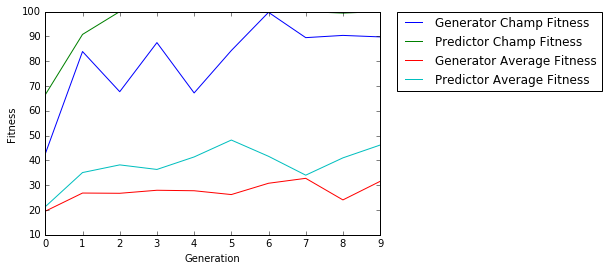

In [73]:
playGame(100,10)

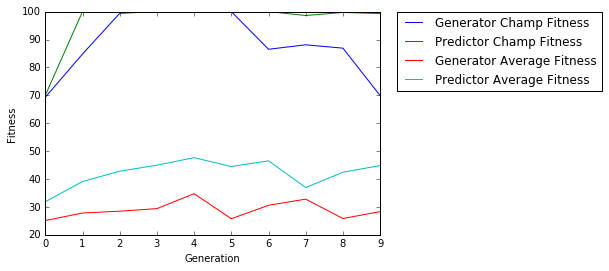

In [74]:
playGame(100,10)

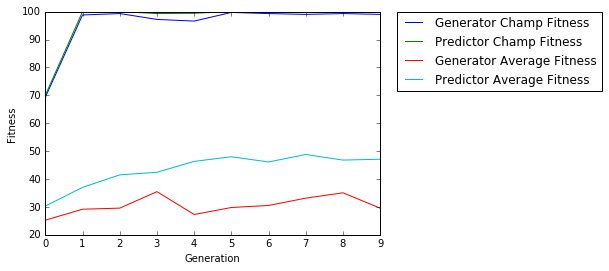

In [75]:
playGame(100,10)

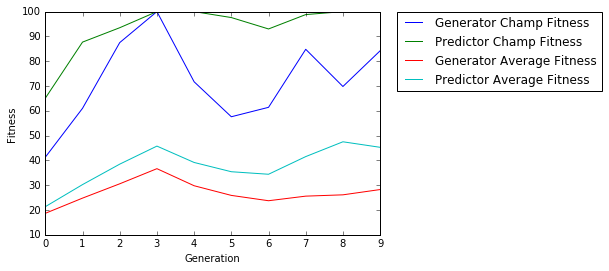

In [76]:
playGame(100,10)

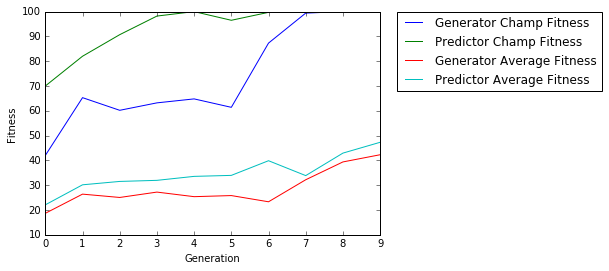

In [77]:
playGame(100,10)

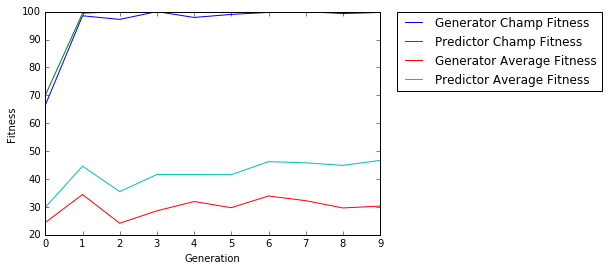

In [78]:
playGame(100,10)